In [ ]:
%pip install -q python-dotenv langchain-ollma

In [100]:
from dotenv import load_dotenv

load_dotenv()

True

In [ ]:
from langchain_ollama import OllamaLLM
import os
query = 'What do you think of NVIDIA?'

llm = OllamaLLM(model=os.getenv("MODEL"))

llm.invoke(query)

"<think>\n\n</think>\n\nAs of my last update in July 2024, I don't have real-time information. For the most accurate and up-to-date list of companies on the Nasdaq stock exchange, I recommend visiting the official Nasdaq website or using financial news platforms like Bloomberg, Yahoo Finance, or Google Finance, which provide the latest data."

In [102]:
%pip install -q langgraph

/Users/junseongkim/Desktop/langgraph-agent-with-mcp/.venv/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.


In [103]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage

class AgentState(TypedDict):
    messages: list[Annotated[AnyMessage, add_messages]]


In [104]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)



In [105]:
def generate(state: AgentState) -> AgentState:
    messages = state["messages"]
    ai_message = llm.invoke(messages)
    return {'messages': [ai_message]}

In [106]:
from langgraph.graph import START, END

graph_builder.add_node("generate", generate)
graph_builder.add_edge(START, "generate")
graph_builder.add_edge("generate", END)


In [107]:
graph = graph_builder.compile()

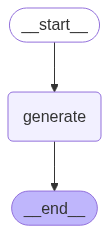

In [108]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [109]:
from langchain_core.messages import HumanMessage

initial_state = {'messages' : [HumanMessage(query)]}
graph.invoke(initial_state)

{'messages': ['<think>\n\n</think>\n\nAs of my last update in July 2024, Nasdaq is a stock exchange in the United States that lists several well-known companies from around the world. The companies typically listed on Nasdaq include:\n\n1. **Apple Inc.** - A global technology leader.\n2. **Microsoft** - A global software company.\n3. **Google** - A global internet services giant.\n4. **Amazon** - A global e-commerce and fulfillment service company.\n5. **Jpmorgan Chase & Co.** - A major financial services entity.\n6. **Prada Group** - A luxury department store chain.\n7. **Tata Power** - One of the largest power utilities in India.\n8. **Walmart** - A global retail company.\n\nThese companies are among the most significant and widely recognized by investors around the world. For a comprehensive list, please refer to the Nasdaq website or financial news sources.']}